# Increment Four : Cancer Risks
- DSUC7: Cancer deaths attributable to alcohol
- DSUC8: Cancers attributable to infections (No Data was found)
- **DSUC9: Cancers vs Human Development Index (HDI)**
- **DSUC13: Cancer risk per cancer type**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import math as m
from scipy.stats import sem
import plotly.graph_objs as go
import numpy as np

In [2]:
def apply_filter(df,choice):
  df_filtered=df[(df['sex_name']=='Both') & (df['age_name']=='Age-standardized') & (df['metric_name']==choice)]
  df_filtered.drop(['measure_id','measure_name','location_id','sex_id','age_id','sex_name','age_name','cause_id','metric_id'],axis=1,inplace=True)
  return df_filtered

In [3]:
def filter_arabs(lst,df):
  filter=[]
  for i in lst:
    filter.append(df[df['Entity']==i])
  arab=pd.concat(filter)
  return arab

#DSUC9: Cancers vs Human Development Index (HDI)

##Data Aggregation

In [4]:
dsuc9=pd.read_csv('/content/drive/MyDrive/Graduation Project/Reema/Datasets/UC9/uc9.csv')
dsuc9

,Unnamed: 0.1,Unnamed: 0,measure_name,Entity,sex_name,age_name,cause_name,metric_name,Year,val,upper,lower,Code,Human Development Index (UNDP),Life expectancy,Expected Years of Schooling (years),Avg_yrs_schooling,"GNI per capita, PPP"
0,0,770,Incidence,Bangladesh,Male,All ages,Esophageal cancer,Rate,1990,3.247875,4.205917,2.321294,BGD,0.387,58.210,5.6,2.84,1554.411011
1,1,771,Incidence,Bangladesh,Female,All ages,Esophageal cancer,Rate,1990,1.919355,2.619193,1.254043,BGD,0.387,58.210,5.6,2.84,1554.411011
2,2,772,Incidence,Bangladesh,Both,All ages,Esophageal cancer,Rate,1990,2.602335,3.149724,1.952692,BGD,0.387,58.210,5.6,2.84,1554.411011
3,3,776,Incidence,Bangladesh,Male,Age-standardized,Esophageal cancer,Rate,1990,7.021135,9.083979,4.992417,BGD,0.387,58.210,5.6,2.84,1554.411011
4,4,777,Incidence,Bangladesh,Female,Age-standardized,Esophageal cancer,Rate,1990,4.728771,6.489373,3.221142,BGD,0.387,58.210,5.6,2.84,1554.411011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528297,528297,227150,Incidence,Qatar,Female,All ages,Nasopharynx cancer,Rate,2017,0.458275,0.609770,0.323211,QAT,0.856,79.981,13.4,9.80,91499.859375
528298,528298,227151,Incidence,Qatar,Both,All ages,Nasopharynx cancer,Rate,2017,0.444411,0.633085,0.313904,QAT,0.856,79.981,13.4,9.80,91499.859375
528299,528299,227155,Incidence,Qatar,Male,Age-standardized,Nasopharynx cancer,Rate,2017,0.700431,1.052645,0.476779,QAT,0.856,79.981,13.4,9.80,91499.859375
528300,528300,227156,Incidence,Qatar,Female,Age-standardized,Nasopharynx cancer,Rate,2017,1.030308,1.377241,0.739641,QAT,0.856,79.981,13.4,9.80,91499.859375


## Data Exploration

In [5]:
dsuc9.drop(['Unnamed: 0.1',	'Unnamed: 0'],inplace=True,axis=1)

In [6]:
dsuc9=dsuc9[(dsuc9['sex_name']=='Both') & (dsuc9['age_name']=='Age-standardized')]

In [7]:
arab_countries=['Tunisia', 'Egypt', 'Jordan', 'Saudi Arabia', 'Oman', 'Bahrain', 'United Arab Emirates', 'Palestine', 'Lebanon','Iraq','Kuwait','Qatar', 'Libya']
arab=filter_arabs(arab_countries,dsuc9)

In [8]:
arab

,measure_name,Entity,sex_name,age_name,cause_name,metric_name,Year,val,upper,lower,Code,Human Development Index (UNDP),Life expectancy,Expected Years of Schooling (years),Avg_yrs_schooling,"GNI per capita, PPP"
5765,Incidence,Tunisia,Both,Age-standardized,Pancreatic cancer,Rate,1991,2.069218,2.526612,1.624760,TUN,0.575,69.407,10.6,3.6,5707.121094
5771,Incidence,Tunisia,Both,Age-standardized,Malignant skin melanoma,Rate,1991,0.487228,0.633972,0.363246,TUN,0.575,69.407,10.6,3.6,5707.121094
5777,Incidence,Tunisia,Both,Age-standardized,Non-melanoma skin cancer,Rate,1991,7.403512,8.660608,6.223959,TUN,0.575,69.407,10.6,3.6,5707.121094
5781,Incidence,Tunisia,Both,Age-standardized,Ovarian cancer,Rate,1991,1.716516,2.322078,1.283619,TUN,0.575,69.407,10.6,3.6,5707.121094
5785,Incidence,Tunisia,Both,Age-standardized,Testicular cancer,Rate,1991,0.256589,0.539427,0.130317,TUN,0.575,69.407,10.6,3.6,5707.121094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515429,Incidence,Libya,Both,Age-standardized,Prostate cancer,Rate,2017,9.581083,12.516713,7.069765,LBY,0.706,72.520,13.4,7.3,13686.022461
515435,Incidence,Libya,Both,Age-standardized,Total cancers,Rate,2017,160.822772,194.257039,130.048417,LBY,0.706,72.520,13.4,7.3,13686.022461
515441,Incidence,Libya,Both,Age-standardized,Colon and rectum cancer,Rate,2017,16.899567,21.347395,12.679352,LBY,0.706,72.520,13.4,7.3,13686.022461
515447,Incidence,Libya,Both,Age-standardized,Lip and oral cavity cancer,Rate,2017,1.879372,2.385962,1.486241,LBY,0.706,72.520,13.4,7.3,13686.022461


In [9]:
arab.isnull().sum()

measure_name                           0
Entity                                 0
sex_name                               0
age_name                               0
cause_name                             0
metric_name                            0
Year                                   0
val                                    0
upper                                  0
lower                                  0
Code                                   0
Human Development Index (UNDP)         0
Life expectancy                        0
Expected Years of Schooling (years)    0
Avg_yrs_schooling                      0
GNI per capita, PPP                    0
dtype: int64

In [10]:
print("Arab countries: ", arab.Entity.unique())
print("Total Number of Arab countries: ", arab.Entity.nunique())

Arab countries:  ['Tunisia' 'Egypt' 'Jordan' 'Saudi Arabia' 'Oman' 'Bahrain'
 'United Arab Emirates' 'Palestine' 'Lebanon' 'Iraq' 'Kuwait' 'Qatar'
 'Libya']
Total Number of Arab countries:  13


In [11]:
print("Unique Years: ",arab.Year.unique(),'\n')
print("Total Number of Years: ",arab.Year.nunique())

Unique Years:  [1991 1990 1993 1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2004
 2003 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017] 

Total Number of Years:  28


In [12]:
for i in arab.Entity.unique():
  print(f"Total Number of Years in {i}: ",arab[arab['Entity']==i]['Year'].nunique(),'\n') # number of years

Total Number of Years in Tunisia:  28 

Total Number of Years in Egypt:  28 

Total Number of Years in Jordan:  28 

Total Number of Years in Saudi Arabia:  18 

Total Number of Years in Oman:  18 

Total Number of Years in Bahrain:  18 

Total Number of Years in United Arab Emirates:  17 

Total Number of Years in Palestine:  14 

Total Number of Years in Lebanon:  13 

Total Number of Years in Iraq:  11 

Total Number of Years in Kuwait:  8 

Total Number of Years in Qatar:  2 

Total Number of Years in Libya:  1 



In [13]:
for i in arab.Entity.unique():
  for y in arab[arab['Entity']==i]['Year'].unique():
    print(f"The Total Number of cancer sites in {y} for {i}:",arab[(arab['Entity']==i) & (arab['Year']==y)]['cause_name'].nunique())

The Total Number of cancer sites in 1991 for Tunisia: 31
The Total Number of cancer sites in 1990 for Tunisia: 31
The Total Number of cancer sites in 1993 for Tunisia: 31
The Total Number of cancer sites in 1992 for Tunisia: 31
The Total Number of cancer sites in 1994 for Tunisia: 31
The Total Number of cancer sites in 1995 for Tunisia: 31
The Total Number of cancer sites in 1996 for Tunisia: 31
The Total Number of cancer sites in 1997 for Tunisia: 31
The Total Number of cancer sites in 1998 for Tunisia: 31
The Total Number of cancer sites in 1999 for Tunisia: 31
The Total Number of cancer sites in 2000 for Tunisia: 31
The Total Number of cancer sites in 2001 for Tunisia: 31
The Total Number of cancer sites in 2002 for Tunisia: 31
The Total Number of cancer sites in 2004 for Tunisia: 31
The Total Number of cancer sites in 2003 for Tunisia: 31
The Total Number of cancer sites in 2005 for Tunisia: 31
The Total Number of cancer sites in 2006 for Tunisia: 31
The Total Number of cancer site

In [14]:
arab

,measure_name,Entity,sex_name,age_name,cause_name,metric_name,Year,val,upper,lower,Code,Human Development Index (UNDP),Life expectancy,Expected Years of Schooling (years),Avg_yrs_schooling,"GNI per capita, PPP"
5765,Incidence,Tunisia,Both,Age-standardized,Pancreatic cancer,Rate,1991,2.069218,2.526612,1.624760,TUN,0.575,69.407,10.6,3.6,5707.121094
5771,Incidence,Tunisia,Both,Age-standardized,Malignant skin melanoma,Rate,1991,0.487228,0.633972,0.363246,TUN,0.575,69.407,10.6,3.6,5707.121094
5777,Incidence,Tunisia,Both,Age-standardized,Non-melanoma skin cancer,Rate,1991,7.403512,8.660608,6.223959,TUN,0.575,69.407,10.6,3.6,5707.121094
5781,Incidence,Tunisia,Both,Age-standardized,Ovarian cancer,Rate,1991,1.716516,2.322078,1.283619,TUN,0.575,69.407,10.6,3.6,5707.121094
5785,Incidence,Tunisia,Both,Age-standardized,Testicular cancer,Rate,1991,0.256589,0.539427,0.130317,TUN,0.575,69.407,10.6,3.6,5707.121094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515429,Incidence,Libya,Both,Age-standardized,Prostate cancer,Rate,2017,9.581083,12.516713,7.069765,LBY,0.706,72.520,13.4,7.3,13686.022461
515435,Incidence,Libya,Both,Age-standardized,Total cancers,Rate,2017,160.822772,194.257039,130.048417,LBY,0.706,72.520,13.4,7.3,13686.022461
515441,Incidence,Libya,Both,Age-standardized,Colon and rectum cancer,Rate,2017,16.899567,21.347395,12.679352,LBY,0.706,72.520,13.4,7.3,13686.022461
515447,Incidence,Libya,Both,Age-standardized,Lip and oral cavity cancer,Rate,2017,1.879372,2.385962,1.486241,LBY,0.706,72.520,13.4,7.3,13686.022461


## Data Cleaning 

Remove Qatar and Libya for their records insufficiency 

In [15]:
arab=arab[~((arab['Entity']=='Libya')|(arab['Entity']=='Qatar'))]
print("To check",arab.Entity.unique())

To check ['Tunisia' 'Egypt' 'Jordan' 'Saudi Arabia' 'Oman' 'Bahrain'
 'United Arab Emirates' 'Palestine' 'Lebanon' 'Iraq' 'Kuwait']


Exclude:

Other neoplasms: includes tumors that are benign, and tumors for which there is uncertainty whether they are malignant or benign.
 
Total Cancers: Sum of all cancer rates excluding " Other neoplasms

In [16]:
total_df=arab[arab['cause_name']=='Total cancers']

In [17]:
other=arab[arab['cause_name']=='Other neoplasms']
arab=arab[(arab['cause_name']!='Other neoplasms')&(arab['cause_name']!='Total cancers') ]

## Feature Engineering

Adding average incidence rate per year for all cancer sites

In [18]:
arab1=arab[(arab['Entity']=='Qatar')]
total=[]
for i in arab1.Year.unique():
    total.append(arab1[arab1['Year']==i]['cause_name'].nunique())

In [19]:
arab

,measure_name,Entity,sex_name,age_name,cause_name,metric_name,Year,val,upper,lower,Code,Human Development Index (UNDP),Life expectancy,Expected Years of Schooling (years),Avg_yrs_schooling,"GNI per capita, PPP"
5765,Incidence,Tunisia,Both,Age-standardized,Pancreatic cancer,Rate,1991,2.069218,2.526612,1.624760,TUN,0.575,69.407,10.6,3.6,5707.121094
5771,Incidence,Tunisia,Both,Age-standardized,Malignant skin melanoma,Rate,1991,0.487228,0.633972,0.363246,TUN,0.575,69.407,10.6,3.6,5707.121094
5777,Incidence,Tunisia,Both,Age-standardized,Non-melanoma skin cancer,Rate,1991,7.403512,8.660608,6.223959,TUN,0.575,69.407,10.6,3.6,5707.121094
5781,Incidence,Tunisia,Both,Age-standardized,Ovarian cancer,Rate,1991,1.716516,2.322078,1.283619,TUN,0.575,69.407,10.6,3.6,5707.121094
5785,Incidence,Tunisia,Both,Age-standardized,Testicular cancer,Rate,1991,0.256589,0.539427,0.130317,TUN,0.575,69.407,10.6,3.6,5707.121094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521489,Incidence,Kuwait,Both,Age-standardized,Mesothelioma,Rate,2017,0.314564,0.375353,0.252423,KWT,0.803,75.311,13.6,7.3,58767.656250
521495,Incidence,Kuwait,Both,Age-standardized,Hodgkin lymphoma,Rate,2017,0.801425,1.043917,0.624583,KWT,0.803,75.311,13.6,7.3,58767.656250
521501,Incidence,Kuwait,Both,Age-standardized,Non-Hodgkin lymphoma,Rate,2017,6.695961,7.926866,5.537427,KWT,0.803,75.311,13.6,7.3,58767.656250
521507,Incidence,Kuwait,Both,Age-standardized,Multiple myeloma,Rate,2017,1.203138,1.580038,0.981254,KWT,0.803,75.311,13.6,7.3,58767.656250


Adding the weighted Average for each country across all years

In [20]:
lst=[]
for i in arab.Entity:
  lst.append(arab[arab['Entity']==i]['Year'].nunique()) 
weights =pd.DataFrame(list(zip(lst,arab.Entity)),columns=['Num','Entity'])
def weighted_average_m1(distribution, weights1):
    return round(sum([distribution[i]*weights1[i] for i in range(len(distribution))])/sum(weights1),2)


avgs=[]
for i in arab.Entity:
  distribution = list(arab[arab['Entity']==i]['val'])
  weights1=list(weights[weights['Entity']==i]['Num'])
  avgs.append(weighted_average_m1(distribution, weights1))
arab['Weighted_Average']=avgs

In [21]:
arab

,measure_name,Entity,sex_name,age_name,cause_name,metric_name,Year,val,upper,lower,Code,Human Development Index (UNDP),Life expectancy,Expected Years of Schooling (years),Avg_yrs_schooling,"GNI per capita, PPP",Weighted_Average
5765,Incidence,Tunisia,Both,Age-standardized,Pancreatic cancer,Rate,1991,2.069218,2.526612,1.624760,TUN,0.575,69.407,10.6,3.6,5707.121094,4.49
5771,Incidence,Tunisia,Both,Age-standardized,Malignant skin melanoma,Rate,1991,0.487228,0.633972,0.363246,TUN,0.575,69.407,10.6,3.6,5707.121094,4.49
5777,Incidence,Tunisia,Both,Age-standardized,Non-melanoma skin cancer,Rate,1991,7.403512,8.660608,6.223959,TUN,0.575,69.407,10.6,3.6,5707.121094,4.49
5781,Incidence,Tunisia,Both,Age-standardized,Ovarian cancer,Rate,1991,1.716516,2.322078,1.283619,TUN,0.575,69.407,10.6,3.6,5707.121094,4.49
5785,Incidence,Tunisia,Both,Age-standardized,Testicular cancer,Rate,1991,0.256589,0.539427,0.130317,TUN,0.575,69.407,10.6,3.6,5707.121094,4.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521489,Incidence,Kuwait,Both,Age-standardized,Mesothelioma,Rate,2017,0.314564,0.375353,0.252423,KWT,0.803,75.311,13.6,7.3,58767.656250,4.84
521495,Incidence,Kuwait,Both,Age-standardized,Hodgkin lymphoma,Rate,2017,0.801425,1.043917,0.624583,KWT,0.803,75.311,13.6,7.3,58767.656250,4.84
521501,Incidence,Kuwait,Both,Age-standardized,Non-Hodgkin lymphoma,Rate,2017,6.695961,7.926866,5.537427,KWT,0.803,75.311,13.6,7.3,58767.656250,4.84
521507,Incidence,Kuwait,Both,Age-standardized,Multiple myeloma,Rate,2017,1.203138,1.580038,0.981254,KWT,0.803,75.311,13.6,7.3,58767.656250,4.84


Binning:

HDI is divided into four tiers: very high human development (0.8-1.0), high human development (0.7-0.79), medium human development (0.55-.70), and low human development (below 0.55).

In [22]:
def cut(arr):
    bins = np.empty(arr.shape[0])
    for idx, x in enumerate(arr):
        if (x >= 0) & (x < 0.55):
            bins[idx] = 1
        elif (x >= 0.55) & (x < 0.7):
            bins[idx] = 2
        elif (x >= 0.7) & (x < 0.79):
            bins[idx] = 3
        elif (x >= 0.79) & (x < 1):
            bins[idx] = 4

    return bins

In [23]:
arab['HDI_Classes']=cut(arab['Human Development Index (UNDP)'])
arab['HDI_Classes'].replace({2.0:'Medium',1.0:'Low',3.0:'High',4.0:'Very High'},inplace=True)

In [24]:
#arab.to_csv('DSUC9.csv')

##Descriptive Analytics

In [25]:
arab.groupby('HDI_Classes')['Entity'].value_counts()

HDI_Classes  Entity              
High         Jordan                  522
             Lebanon                 377
             Tunisia                 319
             Oman                    290
             Saudi Arabia            232
Low          Egypt                    29
Medium       Egypt                   783
             Tunisia                 493
             Palestine               406
             Iraq                    319
             Jordan                  290
Very High    Bahrain                 522
             United Arab Emirates    493
             Saudi Arabia            290
             Kuwait                  232
             Oman                    232
Name: Entity, dtype: int64

In [26]:
arab.groupby(['HDI_Classes'])['Weighted_Average'].describe()

,count,mean,std,min,25%,50%,75%,max
HDI_Classes,,,,,,,,
High,1740.0,5.960833,2.170707e+00,4.11,4.49,4.96,5.61,10.00
Low,29.0,3.830000,4.519498e-16,3.83,3.83,3.83,3.83,3.83
Medium,2291.0,4.561013,6.123068e-01,3.83,3.83,4.49,4.96,5.49
Very High,1769.0,6.036066,1.237402e+00,4.11,4.84,6.35,7.60,7.60


In [27]:
xx=arab.groupby(['cause_name','HDI_Classes'])['val'].describe()
mean=xx.unstack(level='cause_name')['mean']
mean

cause_name,Bladder cancer,Brain and central nervous system cancer,Breast cancer,Cervical cancer,Colon and rectum cancer,Esophageal cancer,Gallbladder and biliary tract cancer,Hodgkin lymphoma,Kidney cancer,Larynx cancer,...,Other malignant neoplasms,Other pharynx cancer,Ovarian cancer,Pancreatic cancer,Prostate cancer,Stomach cancer,Testicular cancer,Thyroid cancer,"Tracheal, bronchus, and lung cancer",Uterine cancer
HDI_Classes,,,,,,,,,,,,,,,,,,,,,
High,11.666440,3.740529,27.961752,2.738708,17.147014,1.509437,2.036076,1.596201,2.875032,2.688996,...,11.576548,0.516124,3.005598,4.247351,14.734965,7.408029,1.102853,3.926072,16.693216,3.063951
Low,11.765395,2.856960,7.081557,1.425699,5.928675,1.216732,1.309266,0.419123,1.061743,1.017796,...,6.899370,0.203467,0.855781,1.998758,3.576945,5.629706,0.145049,1.304547,6.574163,1.195930
Medium,10.289150,4.389569,17.042257,2.212510,11.615789,1.198186,1.680272,0.706400,2.000191,2.134197,...,7.711241,0.359183,1.919215,3.442853,7.249400,6.205324,0.350922,2.343897,14.496336,2.446869
Very High,10.165450,4.182553,20.739725,3.148181,18.378847,4.084753,1.793220,1.107900,4.832956,2.408107,...,12.486250,0.544870,3.011014,8.581797,15.444465,8.715695,0.716688,3.658407,18.167151,2.660258


##Data Visualizations

### Functions

In [28]:
def calc(df):
  lst=[]
  site=df.cause_name.unique()
  for i in site:
      lst.append(df[df['cause_name']==i]['val'].mean(skipna=True))
  return lst,site

In [29]:
def error_bars(var,flag):
  if flag==1:
    error_country=[]
    country=arab[arab['Entity']==var]
    for i in country.Year:
      error_country.append(sem(country[(country['Year']==i)]['val'].values))
    return error_country
  else:
    error_site=[]
    site=arab[arab['cause_name']==var]
    for i in site.Year:
      error_site.append(sem(site[site['Year']==i]['val'].values))
    return error_site

In [30]:
def series(df1,option):
  if option=='Entity':
    flag=1
  else:
    flag=0
  for i in arab1[option].unique():
    df= df1[df1[option]==i]
    er=error_bars(i,flag)
    fig = go.Figure([
    go.Scatter(
        name='YLD',
        x=df['Year'],
        y=list(df['val']),
        mode='lines',
        line=dict(color='black'),
    ),
        go.Scatter(
        name='Upper Bound',
        x=df['Year'],
        y=df['val']+er,
        mode='lines',
        marker=dict(color="#E7E7E7"),
        fill='tonexty'

    ),
        go.Scatter(
        name='Lower Bound',
        x=df['year'],
        y=df['val']-er,
        mode='lines',
        marker=dict(color="#E7E7E7"),
        fill='tonexty'

    ),
    ])
    fig.update_layout(
    yaxis_title='Average Number of Years Lost to Disability', xaxis_title='Years',
    title=f'Average Number of Years Lost to Disability (YLD) in {i} (1990-2019)', plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)',
    hovermode="x"
    )
    fig.show()

In [31]:
er=[]
for i in arab.cause_name.unique():
  er.append(sem(arab[arab['cause_name']==i]['val'].values.ravel()))

In [32]:
xx,yy=calc(arab)
fig = px.scatter(arab, y=yy, x=xx, error_x=er, orientation='h',title="Average Incidence Rate Per Cancer Site Across Arab Countries",labels={'y':'Cancer Site','x':'Average Incidence Rate'})
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                                plot_bgcolor='rgba(0, 0, 0, 0)',
                                paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [33]:

lst=[]
for i in arab.Entity.unique():
  lst.append(arab[arab['Entity']==i]['Year'].nunique()) 
  
weights =pd.DataFrame(list(zip(lst,arab.Entity)),columns=['Num','Entity'])

In [34]:
xx,yy=calc(arab)
for i in arab.Year.unique():
  arab1=arab[arab['Year']==i]
  fig = px.scatter(arab1, y='Weighted_Average', x='Entity', orientation='h',title=f"Average Incidence Rate Per Cancer Site Across Arab Countries in {i}<br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>",labels={'Weighted_Average':'Weighted Average  ','Entity':'Arab Country'},color='HDI_Classes')
  fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                                plot_bgcolor='rgba(0, 0, 0, 0)',
                                paper_bgcolor='rgba(0, 0, 0, 0)')
  fig.show()

In [35]:
xx,yy=calc(arab)

fig = px.scatter(arab, y='Weighted_Average', x='Entity',hover_data=['Year'], orientation='h',title=f"Average Incidence Rate Per Cancer Site Across Arab Countries <br><sup>iCanViz Research and Development Project 2023 - GA4DH and PSUT - Prof.Mohammad Odeh, Dr.Serin Atiani, Reema Maen, Mahmoud Saber</sup>",labels={'Weighted_Average':'Weighted Average  ','Entity':'Arab Country'},color='HDI_Classes')
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                                plot_bgcolor='rgba(0, 0, 0, 0)',
                                paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [36]:
er=[]
import math as m
from scipy.stats import sem

for i in arab.Entity:
  er.append(sem(arab[arab['Entity']==i]['val'].values.ravel()))

<ipython-input-37-623f1ecc51a7>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



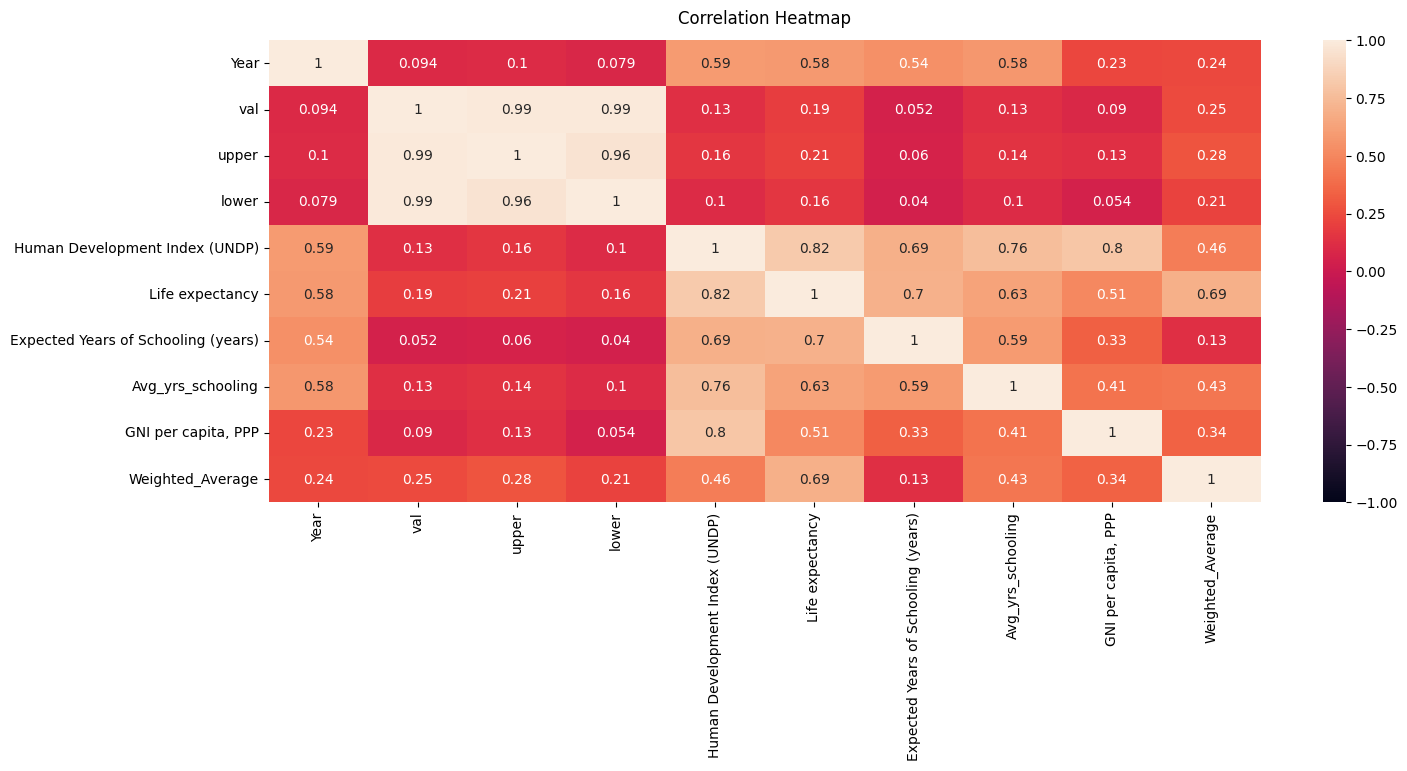

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(arab.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [38]:
#Plot HDI against the population

In [39]:
fig = px.bar(arab, y='val', x='cause_name',color='HDI_Classes',hover_data=['Entity'],barmode='group', title="Total Incidence Rate Per Cancer Site Across Arab Countries", width=1200, height=500,labels={'cause_name':'Cancer Site','val':'Total Incidence Rate'})
fig.update_traces(dict(marker_line_width=0))
fig.show()

In [73]:

for i in arab.cause_name.unique():
  fig =go.Figure()

  fig.add_trace(go.Scatter(x=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='Low')]['Year'].unique(), y=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='Low')]['val'],
                    mode='markers',
                    name='Low',
                 
                   
                 ))
  fig.add_trace(go.Scatter(x=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='High')]['Year'].unique(), y=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='High')]['val'],
                    mode='markers',
                    name='High',
                 
                   
                 ))

  
  fig.add_trace(go.Scatter(x=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='Medium')]['Year'].unique(), y=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='Medium')]['val'],
                    mode='markers',
                    name='Medium',
                 
                   
                 ))
  
  fig.add_trace(go.Scatter(x=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='Very High')]['Year'].unique(), y=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='Very High')]['val'],
                    mode='markers',
                    name='Very High',
                 
                   
                 ))
  
  fig.update_layout(title=f'{i} Cancer Incidence Rate vs HDI Classifications in the Arab World 1990 - 2019 <br><sup>iCanViz Research and Development Project 2023 - GA4DH, PSUT, and Al Ain - Prof.Mohammad Odeh, Dr.Serin Atiani,Dr.Faten Kharbat, Reema Maen, Mahmoud Saber</sup>',
                   xaxis_title='Year',
                   yaxis_title='Rate')
  fig.show()

In [41]:
fig = go.Figure()
fig.add_trace( go.Box(
    y=list(arab[(arab['HDI_Classes']=='Medium') ]['val']),
    x=arab[(arab['cause_name']=='Breast cancer')]['Year'],
    name='Medium',

        ))
fig.add_trace( go.Box(
    y=list(arab[(arab['HDI_Classes']=='High') ]['val']),
    x=arab[(arab['cause_name']=='Breast cancer')]['Year'],
    name='High',

        ))
fig.update_layout(
    yaxis_title='Cancer Incidences',
    boxmode='group'
)
fig.show()

In [43]:
for i in arab.cause_name.unique():
    fig = px.box(arab, x=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='High')]['Year'],y=arab[(arab['cause_name']==i) & (arab['HDI_Classes']=='High')]['val'],
                 title=f'{i} Incidence Rate for Arab Countries with High HDI')
    fig.show()

In [44]:
for i in arab.cause_name.unique():
    fig = px.box(arab, x=arab[(arab['cause_name']==i)]['Year'],y=arab[(arab['cause_name']==i)]['val'],color=arab[(arab['cause_name']==i)]['HDI_Classes'],
                 title=f'{i} Incidence Rate in the Arab Countries for all HDI Categories')
    fig.show()

In [45]:
countries=total_df.Entity.unique()
for i in countries:
  df=total_df[total_df['Entity']==i]
  fig = px.scatter(df, y='Avg_yrs_schooling', x='val',trendline="ols",hover_data=['Entity','Year'], title=f"Total Incidence Rate Per Cancer Site VS Average Years of Schooling in {i}", width=1400, height=500,labels={'Avg_yrs_schooling':'Average Years of Schooling','val':'Total Incidence Rate'})
  fig.show()

In [46]:
countries=total_df.Entity.unique()
for i in countries:
  df=total_df[total_df['Entity']==i]
  fig = px.scatter(df, y='val', x='Year',color='Expected Years of Schooling (years)',trendline="ols",hover_data=['Entity','Year'], title=f"Total Incidence Rate Per Cancer Site VS GNI Per Capita in {i}", width=1400, height=500,labels={'Avg_yrs_schooling':'Average Years of Schooling','val':'Total Incidence Rate'})
  fig.show()

In [47]:
countries=total_df.Entity.unique()
for i in countries:
  df=total_df[total_df['Entity']==i]
  fig = px.scatter(df, y='val', x='Year',color='GNI per capita, PPP',trendline="ols",hover_data=['Entity','Year'], title=f"Total Incidence Rate Per Cancer Site VS GNI Per Capita in {i}", width=1400, height=500,labels={'Avg_yrs_schooling':'Average Years of Schooling','val':'Total Incidence Rate'})
  fig.show()

#DSUC13: Cancer Risk per Cancer Type - Obesity


##Data Aggregation

In [48]:
def Enhance(dir,sites):
  df=pd.read_csv(dir,encoding='latin-1')
  df.drop('Attributable fraction',axis=1,inplace=True)
  df.rename(columns={'Country':sites,'Rank':'Country'},inplace=True)
  return df

def Merge(df):
   countries=df[0]['Country'].unique()
   final_df=pd.concat(df,axis=1)
   final_df.insert(0,'Entity',countries)
   final_df.drop('Country',axis=1,inplace=True) 
   return final_df

dir='/content/drive/MyDrive/Graduation Project/Reema/Datasets/UC13/obesity '

df=[]
for file in os.listdir(dir):
  name=file
  sites=name.split()[0]
  dir_new = dir+"/"+name
  df.append(Enhance(dir_new,sites))
dsuc13=Merge(df)
dsuc13

,Entity,data,breast,Colon,corpus,Gallbladder,Kidney,Oesophageal,ovary,Pencereas,rectum
1,Czech Republic,8.5%,20.2%,22.3%,60.5%,61.0%,37.3%,56.4%,9.9%,16.7%,12.3%
2,Malta,7.6%,18.5%,18.4%,56.3%,60.2%,29.9%,49.6%,9.0%,13.9%,9.8%
3,Barbados,7.6%,18.1%,18.1%,54.5%,60.0%,29.4%,48.1%,8.1%,13.8%,9.5%
4,Jordan,7.2%,17.3%,17.4%,53.6%,59.9%,29.1%,48.0%,8.1%,13.5%,9.1%
5,Puerto Rico,7.2%,17.3%,17.2%,53.5%,59.8%,28.8%,47.2%,7.9%,13.4%,9.1%
...,...,...,...,...,...,...,...,...,...,...,...
172,Burundi,0.39%,1.6%,1.3%,7.1%,0.00%,0.00%,4.8%,0.71%,0.70%,0.62%
173,Madagascar,0.36%,1.3%,1.1%,5.4%,0.00%,0.00%,3.1%,0.68%,0.52%,0.55%
174,Ethiopia,0.33%,1.2%,0.92%,5.3%,0.00%,0.00%,2.7%,0.51%,0.00%,0.43%
175,Viet Nam,0.31%,1.1%,0.70%,3.3%,0.00%,0.00%,1.7%,0.49%,0.00%,0.34%


In [49]:
dsuc4=pd.read_csv('/content/drive/MyDrive/Graduation Project/Reema/Datasets/UC4/uc4.csv')
dsuc4_f=dsuc4[(dsuc4['year']==2012) & (dsuc4['sex_name']=='Both')& (dsuc4['age_name']=='All ages') & (dsuc4['metric_name']=='Number')][['location_name','cause_name','val']]
dsuc4_f.rename(columns={'location_name':'Entity'},inplace=True)
dsuc4_ff=dsuc4_f[(dsuc4_f['cause_name']=='Gallbladder and biliary tract cancer') | (dsuc4_f['cause_name']=='Breast cancer')
 | (dsuc4_f['cause_name']=='Uterine cancer') | (dsuc4_f['cause_name']=='Kidney cancer') | (dsuc4_f['cause_name']=='Ovarian cancer')
 | (dsuc4_f['cause_name']=='Esophageal cancer') | (dsuc4_f['cause_name']=='Pancreatic cancer') | (dsuc4_f['cause_name']=='Pancreatic cancer') 
 | (dsuc4_f['cause_name']=='Colon and rectum cancer')]

In [50]:
dsuc13_new=pd.merge(dsuc13, dsuc4_ff, how='right',on=['Entity'])
dsuc13_new.dropna(inplace=True)

In [51]:
obesity=pd.read_csv('/content/drive/MyDrive/Graduation Project/Reema/Datasets/UC13/share-of-adults-defined-as-obese.csv')
obesity.rename(columns={'Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes':'Percentage'},inplace=True)
obesity=obesity[obesity['Year']==2012]
dsuc13_new2=pd.merge(dsuc13_new, obesity, how='left',on=['Entity'])


In [52]:
arab_countries=['Qatar',  'Iraq', 'Syrian Arab Republic' ,'Libya', 'Jordan', 'Yemen', 'Morocco','Egypt', 'Saudi Arabia','Tunisia',  'Oman', 'Bahrain', 'United Arab Emirates']
arab_obesity=filter_arabs(arab_countries,dsuc13_new2)
arab_obesity

,Entity,data,breast,Colon,corpus,Gallbladder,Kidney,Oesophageal,ovary,Pencereas,rectum,cause_name,val,Code,Year,Percentage
74,Qatar,4.9%,12.2%,13.0%,41.7%,47.8%,22.2%,39.3%,5.4%,10.1%,6.9%,Esophageal cancer,14.650596,QAT,2012.0,30.6
1016,Qatar,4.9%,12.2%,13.0%,41.7%,47.8%,22.2%,39.3%,5.4%,10.1%,6.9%,Kidney cancer,37.185632,QAT,2012.0,30.6
1045,Qatar,4.9%,12.2%,13.0%,41.7%,47.8%,22.2%,39.3%,5.4%,10.1%,6.9%,Breast cancer,225.320435,QAT,2012.0,30.6
1046,Qatar,4.9%,12.2%,13.0%,41.7%,47.8%,22.2%,39.3%,5.4%,10.1%,6.9%,Uterine cancer,14.561037,QAT,2012.0,30.6
1047,Qatar,4.9%,12.2%,13.0%,41.7%,47.8%,22.2%,39.3%,5.4%,10.1%,6.9%,Colon and rectum cancer,113.991746,QAT,2012.0,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,United Arab Emirates,4.8%,12.2%,12.9%,41.7%,47.8%,22.1%,39.2%,5.4%,10.0%,6.8%,Uterine cancer,38.941919,ARE,2012.0,24.5
1279,United Arab Emirates,4.8%,12.2%,12.9%,41.7%,47.8%,22.1%,39.2%,5.4%,10.0%,6.8%,Colon and rectum cancer,378.827515,ARE,2012.0,24.5
1280,United Arab Emirates,4.8%,12.2%,12.9%,41.7%,47.8%,22.1%,39.2%,5.4%,10.0%,6.8%,Gallbladder and biliary tract cancer,43.625983,ARE,2012.0,24.5
1281,United Arab Emirates,4.8%,12.2%,12.9%,41.7%,47.8%,22.1%,39.2%,5.4%,10.0%,6.8%,Pancreatic cancer,321.492627,ARE,2012.0,24.5


## Data Cleaning

In [53]:
for i in arab_obesity.iloc[:,1:11]:
  arab_obesity[i] = arab_obesity[i].str.replace('%', '')
arab_obesity['Year']=arab_obesity['Year'].astype('object')

In [54]:
countries=arab_obesity.Entity.unique()
ans=[]
for i in countries:
  df=arab_obesity[arab_obesity['Entity']==i]
  ans.append(list(df.iloc[0,1:11]))

In [55]:
xyx=pd.DataFrame(ans,columns=['data','breast', 'Colon', 'corpus', 'Gallbladder', 'Kidney','Oesophageal', 'ovary', 'Pencereas', 'rectum'])
xyx['Countries']=countries

In [56]:
for i in xyx.iloc[:,:-1]:
  xyx[i]=xyx[i].astype('float')

In [57]:
xyx.drop('corpus',inplace=True,axis=1)

In [58]:
arab_obesity=xyx.copy()

## Descriptive Analysis

In [59]:
xyx

,data,breast,Colon,Gallbladder,Kidney,Oesophageal,ovary,Pencereas,rectum,Countries
0,4.9,12.2,13.0,47.8,22.2,39.3,5.4,10.1,6.9,Qatar
1,3.7,11.2,10.8,44.9,19.8,35.0,5.0,8.7,5.6,Iraq
2,5.5,13.3,13.9,51.1,24.5,42.2,5.9,11.0,7.5,Syrian Arab Republic
3,5.1,12.4,13.2,49.0,22.9,40.5,5.7,10.4,7.0,Libya
4,7.2,17.3,17.4,59.9,29.1,48.0,8.1,13.5,9.1,Jordan
5,2.5,9.5,8.1,33.4,13.4,24.8,4.3,6.7,4.0,Yemen
6,3.2,10.6,9.3,42.8,16.8,30.2,4.6,7.7,4.8,Morocco
7,4.4,11.7,12.2,46.8,21.7,36.4,5.2,9.5,6.4,Egypt
8,6.8,16.4,16.2,58.1,27.1,46.2,7.3,12.8,8.6,Saudi Arabia
9,4.4,11.6,11.9,46.8,21.6,36.0,5.2,9.4,6.3,Tunisia


In [60]:
xyx.mean(axis=1)

<ipython-input-60-1ac2c2d93fb7>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     17.977778
1     16.077778
2     19.433333
3     18.466667
4     23.288889
5     11.855556
6     14.444444
7     17.144444
8     22.166667
9     17.022222
10    16.144444
11    18.755556
12    17.911111
dtype: float64

In [61]:
xyx.std(axis=1)

<ipython-input-61-962aebf9f7bb>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0     15.548294
1     14.553417
2     16.605044
3     15.969346
4     18.848173
5     10.527715
6     13.513522
7     15.016833
8     18.340324
9     14.981720
10    14.623706
11    16.083774
12    15.557590
dtype: float64

In [62]:
xyx.mean()

<ipython-input-62-d7c2634935ec>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



data            4.730769
breast         12.484615
Colon          12.553846
Gallbladder    47.915385
Kidney         21.907692
Oesophageal    37.984615
ovary           5.607692
Pencereas       9.930769
rectum          6.592308
dtype: float64

In [63]:
xyx.std()

<ipython-input-63-02ce0c37aec8>:1: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



data           1.317437
breast         2.170962
Colon          2.538902
Gallbladder    6.560214
Kidney         4.042166
Oesophageal    6.210857
ovary          1.044399
Pencereas      1.864754
rectum         1.406213
dtype: float64

## Data Visualizations 

In [64]:
cols=['breast', 'Colon', 'Gallbladder', 'Kidney','Oesophageal', 'ovary', 'Pencereas', 'rectum']
fig = px.box(xyx,x='Countries',y=cols,title=f"Cancer Incidence Percentages Attribuatable To Obesity In The Arab World 2012",labels={'value':'Incidence Percentage'})
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
fig.show()

In [65]:
fig = go.Figure()
for i in cols:
  fig.add_trace(go.Box(name=i+' cancer',y=xyx[i],boxpoints='all',jitter=0.5, marker_color='blue'))  
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')
fig.update_layout(
    xaxis=dict(title='Cancer Site'),
    yaxis=dict(title='Incidence Percentage'),
    title='Cancer Incidence Percentages Attribuatable To Obesity In The Arab World per Cancer Site 2012',showlegend=False
)

fig.show()

In [66]:
fig = px.bar(xyx,x='Countries',y=cols,barmode='group', title=f"Cancer Incidence Percentages Attribuatable to Obesity per Cancer Site in the Arab World 2012",labels={'Countries':'Arab Countries','value':'Incidence Percenatge','variable':'Cancer Site'})
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', paper_bgcolor='rgba(0, 0, 0, 0)')

fig.show()